## CAPSTONE PROJECT-4 :- PRCP-1004-Fifa20

## PROJECT TEAM ID :- PTID-CDS-NOV-23-1706


# 1.Busines Case:- 
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Explore football skills and cluster football players based on their attributes.

Task3:- Explore the data and attempt all the below asked questions in a
step by step manner:

● Prepare a rank ordered list of top 10 countries with most players. Which
countries are producing the most footballers that play at this level?

● Plot the distribution of overall rating vs. age of players. Interpret what is the
age after which a player stops improving?

● Which type of offensive players tends to get paid the most: the striker, the
right-winger, or the left-winger?

# 1. Business case:

FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 27th installment in the series and was released on 27 September 2019 for Microsoft Windows, PlayStation 4, Xbox One and Nintendo Switch. This is the first game in the franchise to not have an Xbox 360 version and also since FIFA 07 to not have a PlayStation 3 version. The game features VOLTA Football for the first time, a new mode that provides a variance on the traditional 11v11 gameplay and focuses on small-sided street and futsal games. The mode shares similarities to the former FIFA Street series. Additionally, players have the option to create their custom player by gender, clothing, shoes, hats, accessories and tattoos. Following the completion of the three-part series "The Journey" in FIFA 19, players are now able to follow a similar storyline mode in VOLTA Football, which would be played with the player's own character. Alex Hunter also makes a cameo in the game, along with his agent Beatriz Villanova.

The dataset provided includes the players data for the Career Mode from FIFA 15 to FIFA 20 ("players_20.csv"). The data allows multiple comparisons of the same players across the last 6 versions of the videogame.

# 2.Import Libraries:

In [1]:
# Loading the required liabries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import rcParams

# 3. Load Dataset: 

In [2]:
data = pd.read_csv(r"C:\Users\ganes\Downloads\PRCP-1004-Fifa20 (1)\Data\players_20.csv")
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [3]:
data.head(pd.set_option('display.max_columns',None))

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

# 4. Basic Checks:

In [4]:
# shape:
data.shape

(18278, 104)

In [5]:
# dtypes:
data.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [6]:
## find unique categories in data:
for i in  data:
    print(i, data[i].unique())
    print(data[i].value_counts())
    print("*************************")

sofifa_id [158023  20801 190871 ... 252332 251110 233449]
158023    1
247213    1
237712    1
235633    1
252324    1
         ..
202474    1
203398    1
203751    1
203875    1
233449    1
Name: sofifa_id, Length: 18278, dtype: int64
*************************
player_url ['https://sofifa.com/player/158023/lionel-messi/20/159586'
 'https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/20/159586'
 'https://sofifa.com/player/190871/neymar-da-silva-santos-jr/20/159586'
 ... 'https://sofifa.com/player/252332/wei-zhang/20/159586'
 'https://sofifa.com/player/251110/haijian-wang/20/159586'
 'https://sofifa.com/player/233449/ximing-pan/20/159586']
https://sofifa.com/player/158023/lionel-messi/20/159586              1
https://sofifa.com/player/247213/sibiry-keita/20/159586              1
https://sofifa.com/player/237712/valentin-castellanos/20/159586      1
https://sofifa.com/player/235633/yehvann-diouf/20/159586             1
https://sofifa.com/player/252324/rodrigo-riquelme-reche/20/1595

61+2    809
63+2    763
64+2    729
62+2    726
65+2    726
       ... 
84+2      1
86+2      1
82+5      1
87+3      1
27+2      1
Name: lm, Length: 100, dtype: int64
*************************
lcm ['87+2' '81+3' '82+3' nan '83+3' '87+3' '74+3' '78+3' '65+3' '79+3' '62+3'
 '77+3' '79+5' '80+3' '84+3' '85+3' '76+3' '75+3' '67+3' '74+2' '82+2'
 '66+2' '72+3' '83+2' '70+3' '71+3' '69+3' '62+2' '81+2' '78+2' '58+2'
 '72+2' '84+2' '55+3' '74+4' '75+2' '80+2' '73+2' '68+3' '64+3' '60+3'
 '73+3' '79+2' '77+2' '65+2' '69+2' '64+2' '70+2' '71+2' '63+2' '76+2'
 '66+3' '60+2' '67+2' '61+3' '61+2' '57+2' '59+2' '68+2' '53+3' '63+3'
 '57+3' '54+2' '56+2' '53+2' '52+2' '55+2' '51+2' '58+3' '50+2' '47+2'
 '49+2' '48+2' '45+2' '43+2' '44+2' '46+2' '41+2' '42+2' '40+2' '39+2'
 '37+2' '38+2' '35+2' '36+2' '34+2' '33+2' '31+2' '32+2']
58+2    775
59+2    737
61+2    734
60+2    731
63+2    714
       ... 
84+2      1
55+3      1
74+4      1
53+3      1
87+2      1
Name: lcm, Length: 88, dtype: int64
****

In [7]:
# Info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [8]:
# Head:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [9]:
# Tail:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [10]:
# columns:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [11]:
# describe: Statistical report for numerical data.
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [12]:
# Statistical report for categorical data.
data.describe(include="O")

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,1499,18038,1048,16990,1126,7566,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,2,83,29,316,1760,26,921,94,94,94,107,103,103,103,107,103,103,103,100,88,88,88,100,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,No,#Strength,SUB,Sassuolo,2019-07-01,SUB,Early Crosser,61+2,61+2,61+2,63+2,63+2,63+2,63+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,16310,514,7820,17,1465,587,501,725,725,725,736,727,727,727,736,748,748,748,809,775,775,775,809,682,636,636,636,682,667,621,621,621,667


In [13]:
# fetch the numerical columns:
num_col = data.select_dtypes(include=["int64","float64"])
print(num_col.columns)
print(num_col.shape)

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [14]:
# fetch the categorical columns:
cat_col = data.select_dtypes(include=["object"])
print(cat_col.columns)
print(cat_col.shape)

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')
(18278, 43)


In [15]:
#deleting the columns which are not relevant to goal keepers for analyzation:
data.drop(['player_url', 'sofifa_id', 'long_name', 'loaned_from', 'nation_jersey_number',
'player_tags', 'nation_position', 'player_positions','goalkeeping_diving', 'goalkeeping_handling',
'goalkeeping_kicking', 'goalkeeping_positioning'], axis=1 ,inplace=True)


In [16]:
data.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


### Insights:
* We should consider dropping the **player_positions** column due to its numerous tags associated with each player. However, let's retain the **team_positions** column since it only contains a single tag for each player.

In [17]:
# Null Vales:
## Displaying the  null values with max number in descending Order.
null_counts = data.isnull().sum()
null_columns = null_counts[null_counts>0].sort_values(ascending=False)
print(null_columns)

gk_handling             16242
gk_kicking              16242
gk_positioning          16242
gk_speed                16242
gk_diving               16242
gk_reflexes             16242
player_traits           10712
ram                      2036
lm                       2036
lcm                      2036
cm                       2036
rcm                      2036
rm                       2036
lf                       2036
lam                      2036
lwb                      2036
ldm                      2036
cdm                      2036
rdm                      2036
rwb                      2036
lb                       2036
lcb                      2036
cb                       2036
rcb                      2036
cam                      2036
rb                       2036
rw                       2036
physic                   2036
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
rf                       2036
defending 

In [18]:
# Displaying the count of players according to their Natinality:
data["nationality"].value_counts().head(10)

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

# 5. EDA:
# 5.1. Univariate:

In [19]:
!pip install sweetviz

In [20]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 1. Printing the number of player according to their height in cm.

In [21]:
# Printing the number of player according to their height in cm.
data["height_cm"].value_counts()

180    1468
178    1213
185    1193
183    1160
175     990
188     904
182     833
184     820
186     774
177     722
181     704
187     682
176     669
179     641
190     585
173     567
174     483
191     464
170     455
189     439
172     412
193     316
192     290
171     262
168     195
194     173
169     149
196     139
195     136
167     102
165      68
166      60
197      51
198      35
163      29
164      21
199      14
162      12
201      11
200      10
203       6
161       5
202       4
158       3
160       3
159       3
157       1
156       1
205       1
Name: height_cm, dtype: int64

Text(0.5, 1.0, 'Height of Distribution')

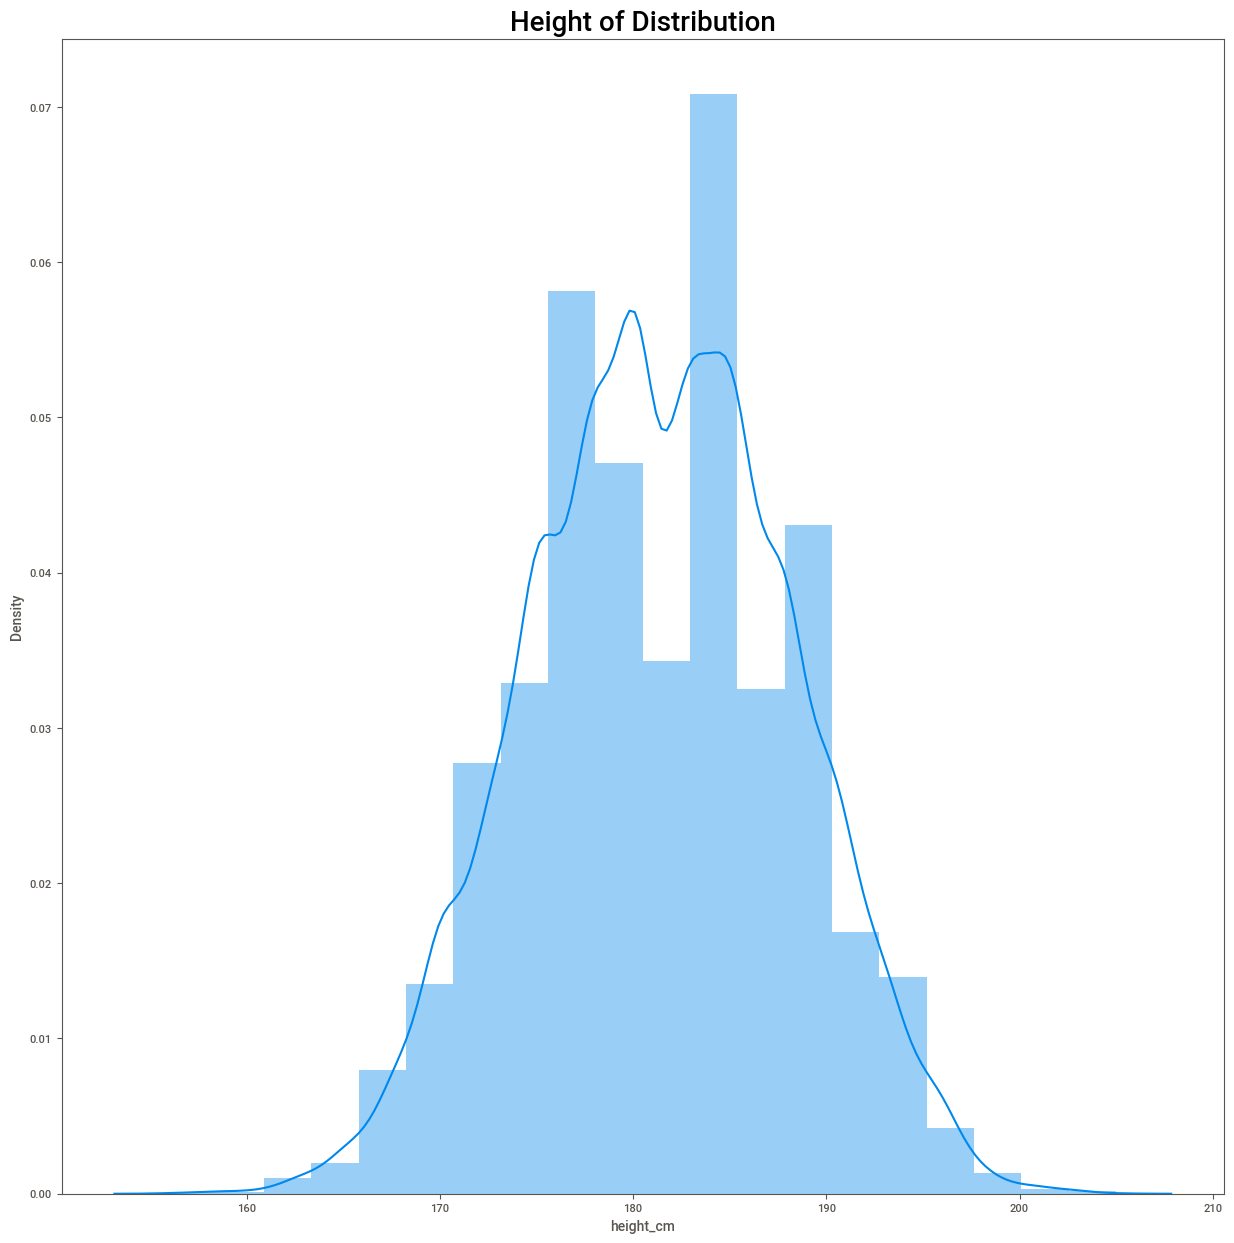

In [22]:
# displaying the graph of player according to their height in cm.

# Setting the figure size pitly. figure(figsize=(15,15)).
plt.figure(figsize=(15,15))

# Setting the dataset from wich data needs to be fetch.
sns.distplot(data["height_cm"], kde=True, bins=20)

# Setting the title for the graph.
plt.title('Height of Distribution', fontsize=20)


### Insights:

* The majority of players fall within the Height range of 175 to 185 in cm.

### 2. Printing the number of player according to their weight in kg.

In [23]:
data['weight_kg'].value_counts()

70     1455
75     1410
80     1060
78     1005
72      983
73      948
74      890
77      880
76      860
68      707
79      659
71      612
82      584
83      532
69      524
81      516
65      488
67      473
84      454
85      445
66      366
64      297
86      296
88      255
87      230
63      207
90      169
62      157
60      142
89      135
61       81
92       81
91       74
93       54
94       42
59       36
58       35
95       29
96       21
57       15
56       13
97       12
98       10
55        6
54        6
101       4
103       3
99        3
102       3
100       2
52        2
104       2
53        2
107       1
110       1
50        1
Name: weight_kg, dtype: int64

Text(0.5, 1.0, 'Weight Distribution')

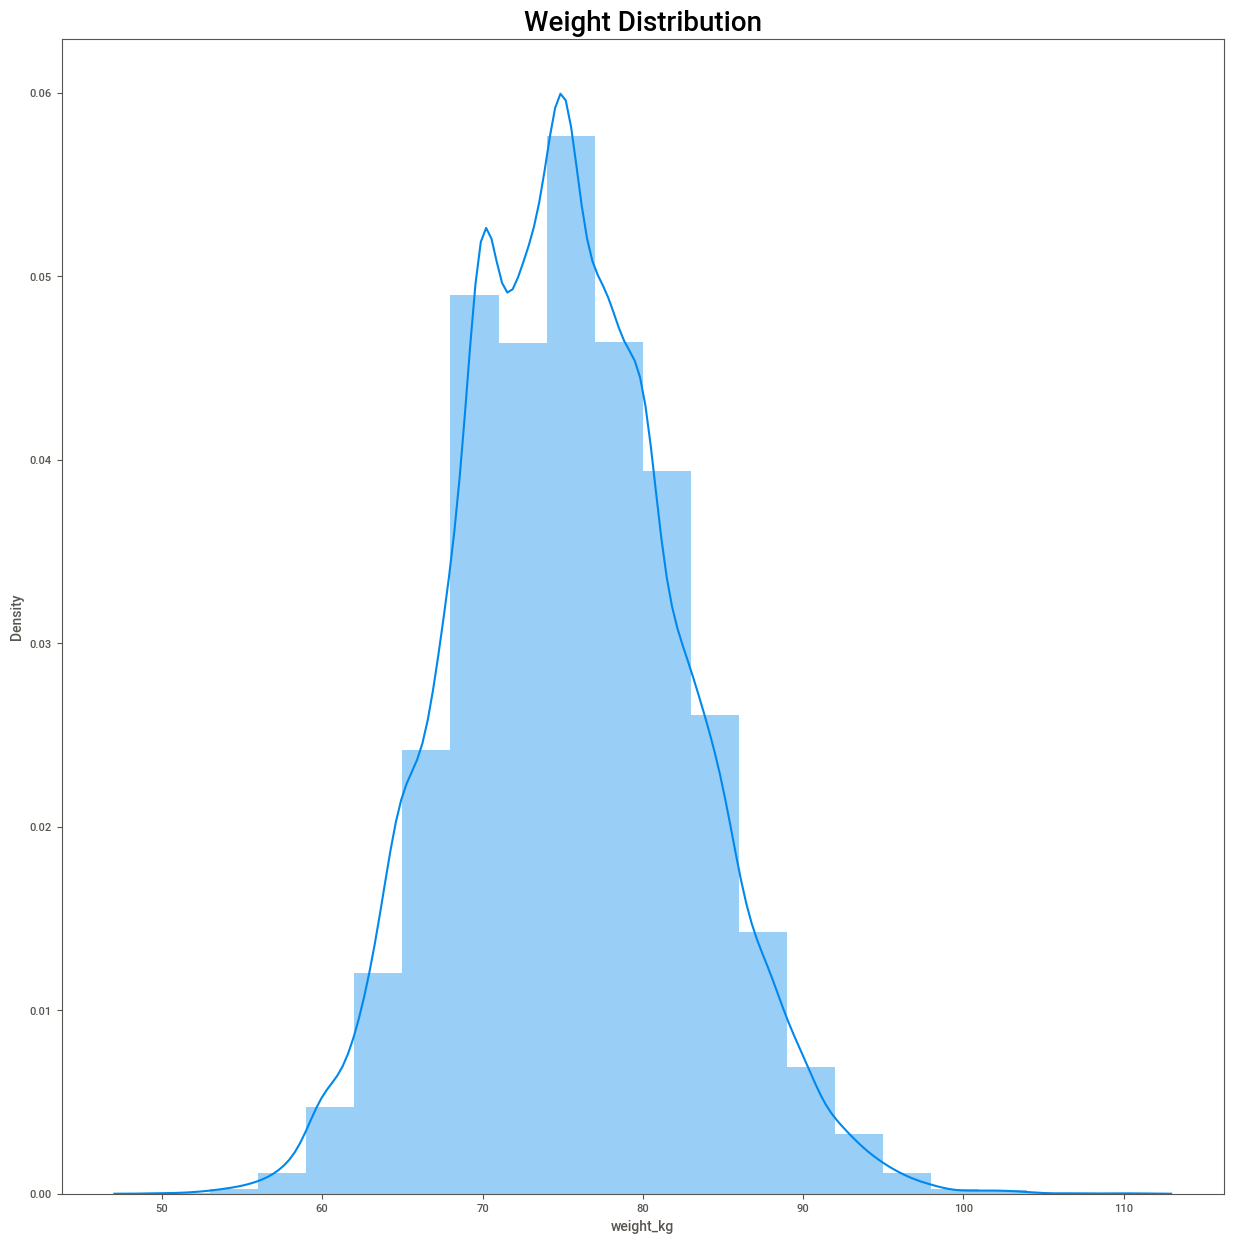

In [24]:
# displaying the graph of player according to their weight in kg.

# Setting the figure size pitly. figure(figsize=(15,15)).
plt.figure(figsize=(15,15))

# Setting the dataset from wich data needs to be fetch.
sns.distplot(data["weight_kg"], kde=True, bins=20)

# Setting the title for the graph.
plt.title('Weight Distribution', fontsize=20)


### Insights:

* The majority of players fall within the weight range of 70 to 80 kg.

### 3. Displaying the number of player according to their Age.

In [25]:
data['age'].value_counts()

22    1446
21    1375
23    1358
27    1324
25    1319
24    1296
26    1270
20    1247
28    1086
19    1011
29     999
30     883
31     807
18     640
32     597
33     475
35     310
34     301
17     229
36     131
37      81
38      42
39      20
40      13
16      12
41       4
42       2
Name: age, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

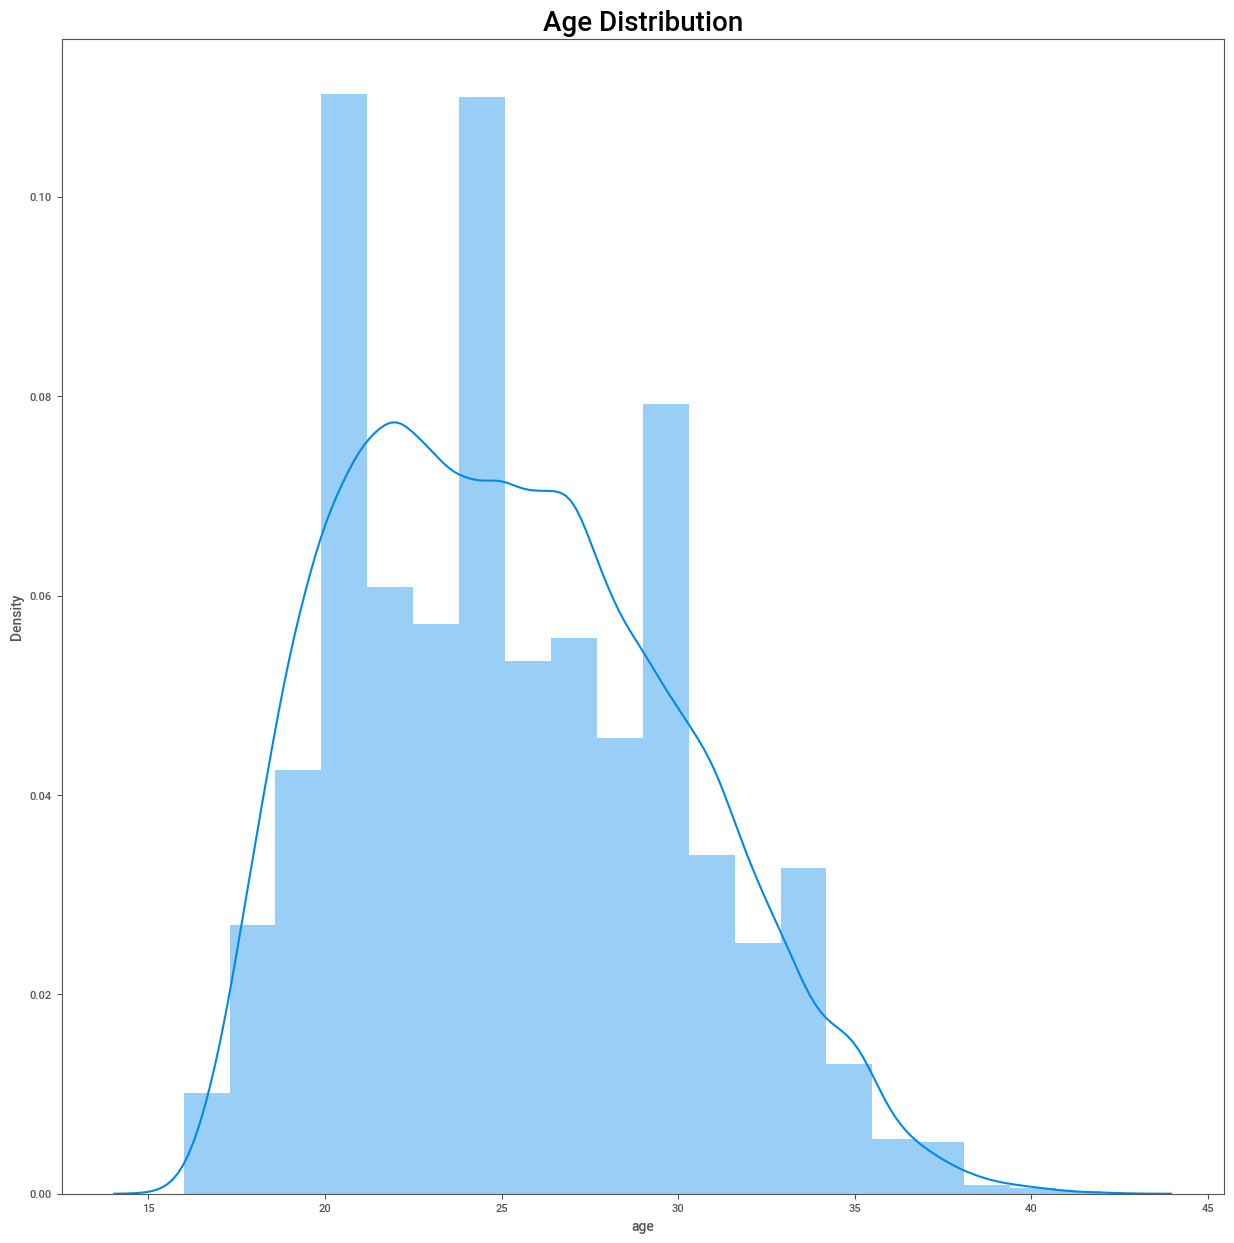

In [26]:
# displaying the graph of player according to their age.

# Setting the figure size pitly. figure(figsize=(15,15)).
plt.figure(figsize=(15,15))

# Setting the dataset from wich data needs to be fetch.
sns.distplot(data["age"], kde=True, bins=20)

# Setting the title for the graph.
plt.title('Age Distribution', fontsize=20)


###  Player count based on Age:

Text(0, 0.5, 'Count')

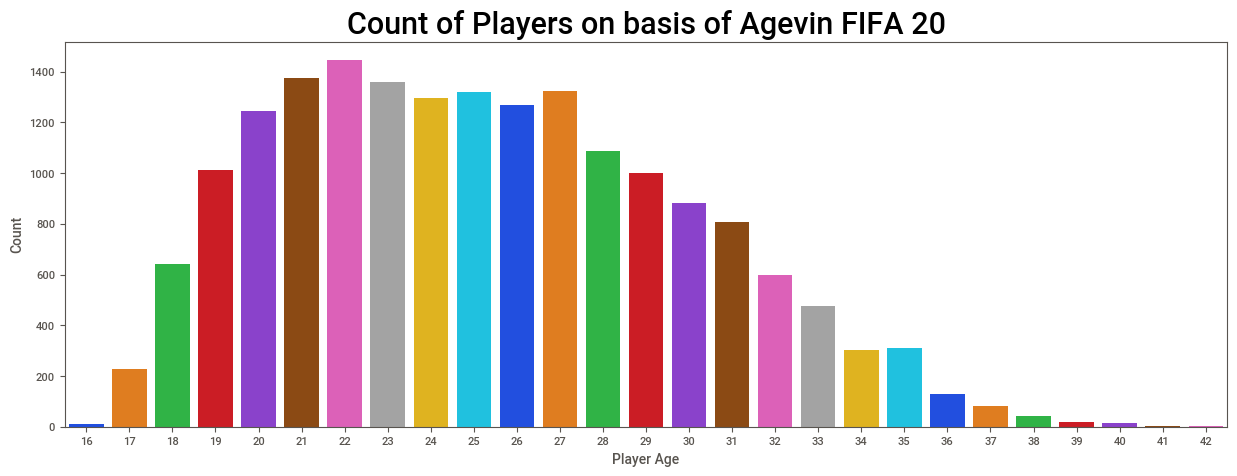

In [27]:
# Setting up the figure size.
plt.figure(figsize=(15,5))

# Setting values for the bar graph.
sns.countplot(data=data , x='age', palette='bright')

# Setting the title for the graph.
plt.title('Count of Players on basis of Agevin FIFA 20', fontsize=22)

# labelling X and Y axis.
plt.xlabel('Player Age')
plt.ylabel('Count')

### Insights:

* The majority of players fall within the age range of 20 to 27 years, with an approximate mean age of 25 years. 
* The age spectrum ranges from a minimum of 16 years to a maximum of 42 years.

### 4. Displaying the number of player Based on  their Nationality.

**Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?**

In [28]:
Top_10_Countries = data["nationality"].value_counts().head(10)
Top_10_Countries

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [29]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


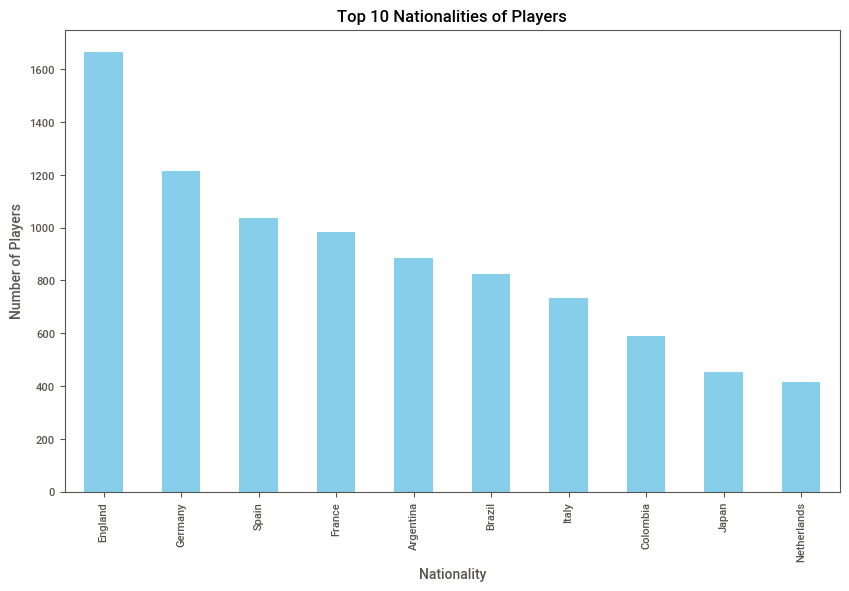

In [30]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
ax=Top_10_Countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Nationalities of Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.show()


### Insights:
* The largest contingent of players in FIFA 20 hails from England, contributing approximately 10% of the total dataset. Following closely are Germany and Spain, securing the second and third positions, respectively. Here is the list of the top 10 countries along with the number of players:

1. England -- 1667
2. Germany -- 1216
3. Spain -- 1035
4. France -- 984
5. Argentina -- 886
6. Brazil -- 824
7. Italy -- 732
8. Colombia -- 591
9. Japan -- 453
10. Netherlands -- 416


### 5. Displaying the foot count of the Player:

In [31]:
data['preferred_foot'].value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

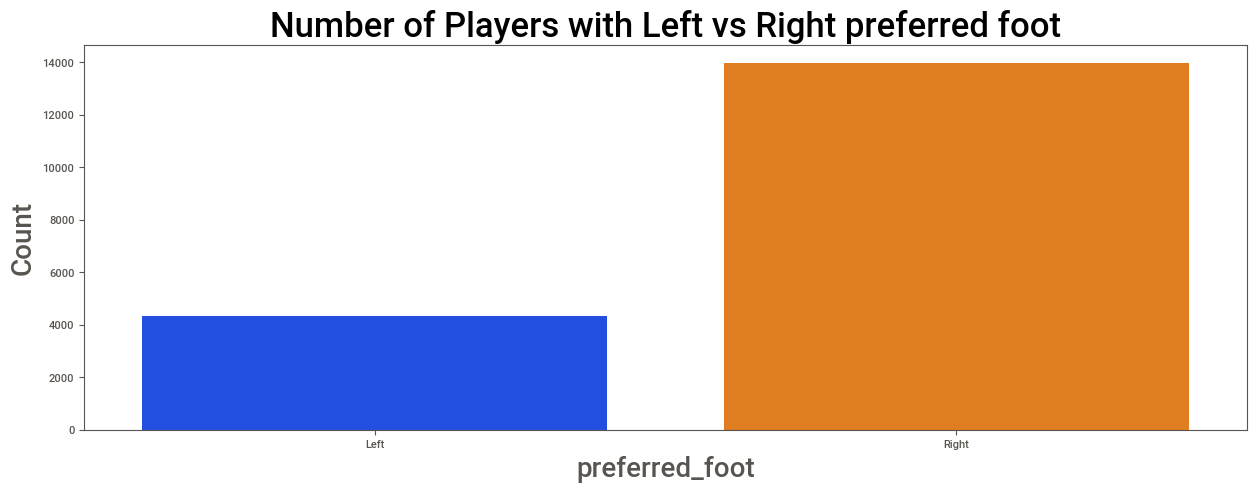

In [32]:
# Setting up the figure size.
plt.figure(figsize=(15,5))

# Setting values for the bar graph.
sns.countplot(data=data , x='preferred_foot', palette='bright')

# Setting the title for the graph.
plt.title('Number of Players with Left vs Right preferred foot', fontsize=25)


# labelling X and Y axis.
plt.xlabel('preferred_foot', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

### Insights:
* Most of the Players are Right Footed. Aroung 76% players have Right preferred Foot. Remaining 24% preferr Left Foot.

In [33]:
# Analyse the data for goal-keepers.
data['team_position'].isnull().sum()

240

In [34]:
# Filling the rows which are having null values.
data['team_position'].fillna(data['team_position'].mode()[0],inplace=True)
data.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [35]:
# checking the null values in "Team position" column.
data["team_position"].isnull().sum()

0

In [36]:
# For goalkeepers, Here we are fetching the players whose team position column values are "GK" 
data_gk = data.loc[data['team_position'] == "GK"]
data_gk.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M. ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,GK,1.0,2014-07-01,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Alisson,26,1992-10-02,191,91,Brazil,Liverpool,89,91,58000000,155000,Right,3,3,1,Medium/Medium,Normal,Yes,111700000.0,GK,1.0,2018-07-19,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,De Gea,28,1990-11-07,192,82,Spain,Manchester United,89,90,56000000,205000,Right,4,3,1,Medium/Medium,Lean,Yes,110600000.0,GK,1.0,2011-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,"Flair, Second Wind, Flair Passes",17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Ederson,25,1993-08-17,188,86,Brazil,Manchester City,88,91,54500000,185000,Left,2,3,1,Medium/Medium,Normal,Yes,104900000.0,GK,31.0,2017-07-01,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,"Leadership, Swerve Pass, Acrobatic Clearance",20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#fetching players other than Goalkeepers.
data_others = data.loc[data["team_position"] != "GK"]
data_others.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,High/High,Normal,Yes,166500000.0,RCM,17.0,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [38]:
# Fetching the null values in data_gk.
data_gk.columns[data.isnull().any()]

Index(['release_clause_eur', 'team_jersey_number', 'joined',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'ls',
       'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [39]:
# Displaying the  null values with max number in descending Order.
null_counts = data_gk.isnull().sum()
null_columns = null_counts[null_counts>0].sort_values(ascending=False)
print(null_columns)

lam                   662
ldm                   662
lm                    662
lcm                   662
cm                    662
rcm                   662
rm                    662
lwb                   662
cdm                   662
cam                   662
rdm                   662
rwb                   662
lb                    662
lcb                   662
cb                    662
rcb                   662
ram                   662
rb                    662
ls                    662
pace                  662
rf                    662
cf                    662
lf                    662
lw                    662
rs                    662
st                    662
rw                    662
physic                662
defending             662
dribbling             662
passing               662
shooting              662
player_traits         316
joined                 41
release_clause_eur     41
dtype: int64


### Insights:
* The essential attributes for a goalkeeper include speed, positioning, reflexes, diving, and handling. 
* Goalkeepers are not heavily associated with attributes such as pace, shooting, passing, dribbling, or defending. 
* Therefore, it is advisable to eliminate columns that lack significant relevance in goalkeeping and exhibit null values, accounting for approximately 3.6% of the dataset.


In [40]:
data_gk = data_gk.drop(['pace', 'shooting', 'passing', 'dribbling','player_traits','physic',
       'defending','ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb'], axis=1)
data_gk.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_reflexes
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,13.0,2014-07-16,2023.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,89
6,M. ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,GK,1.0,2014-07-01,2022.0,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,90
13,Alisson,26,1992-10-02,191,91,Brazil,Liverpool,89,91,58000000,155000,Right,3,3,1,Medium/Medium,Normal,Yes,111700000.0,GK,1.0,2018-07-19,2024.0,85.0,84.0,85.0,89.0,51.0,90.0,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,89
14,De Gea,28,1990-11-07,192,82,Spain,Manchester United,89,90,56000000,205000,Right,4,3,1,Medium/Medium,Lean,Yes,110600000.0,GK,1.0,2011-07-01,2020.0,90.0,84.0,81.0,92.0,58.0,85.0,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,92
25,Ederson,25,1993-08-17,188,86,Brazil,Manchester City,88,91,54500000,185000,Left,2,3,1,Medium/Medium,Normal,Yes,104900000.0,GK,31.0,2017-07-01,2024.0,86.0,82.0,93.0,88.0,63.0,86.0,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,88


In [41]:
# shape of data_gk:
data_gk.shape

(662, 59)

### 6. Displaying the overall of the GK:

In [42]:
data_gk.overall.value_counts().head()

66    52
67    49
73    44
68    42
70    42
Name: overall, dtype: int64

<Axes: xlabel='overall', ylabel='Density'>

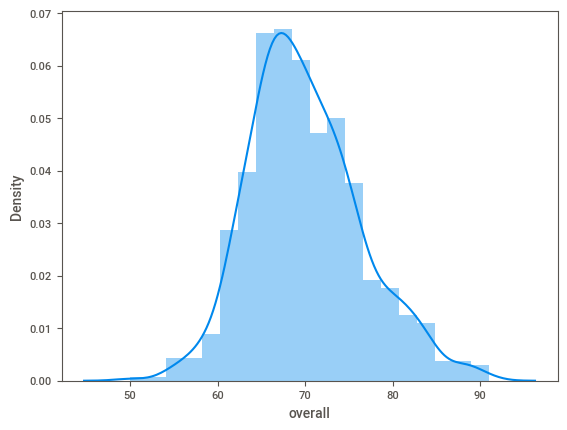

In [43]:
#displaying data distribution of column 'overall' against density)
sns.distplot(a =data_gk["overall"], kde=True , bins=20)

### Insights:
* The goal keeper have overall value in the range 50-90, with a mean of 69.

### 7. Displaying the wage_eur of the GK:

In [44]:
data_gk.wage_eur.value_counts()

1000      153
2000      104
3000       73
4000       43
5000       37
         ... 
75000       1
27000       1
71000       1
67000       1
125000      1
Name: wage_eur, Length: 66, dtype: int64

<Axes: xlabel='wage_eur', ylabel='Density'>

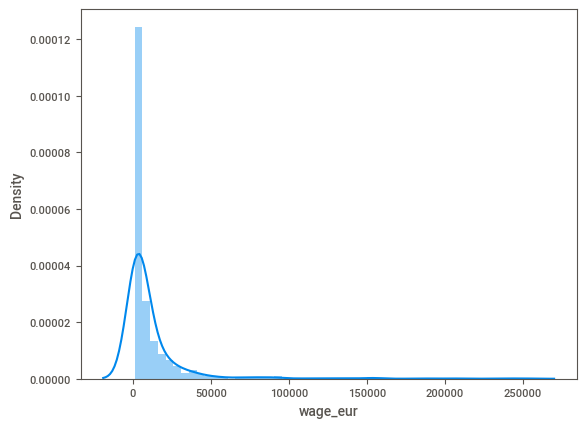

In [45]:
#displaying data distribution of column 'wage_eur' against density)
sns.distplot(a = data_gk["wage_eur"], kde=True)

###  Insights:
* The wage seems relatively less about 50K euros for the goalkeepers. The players may have higher wages.

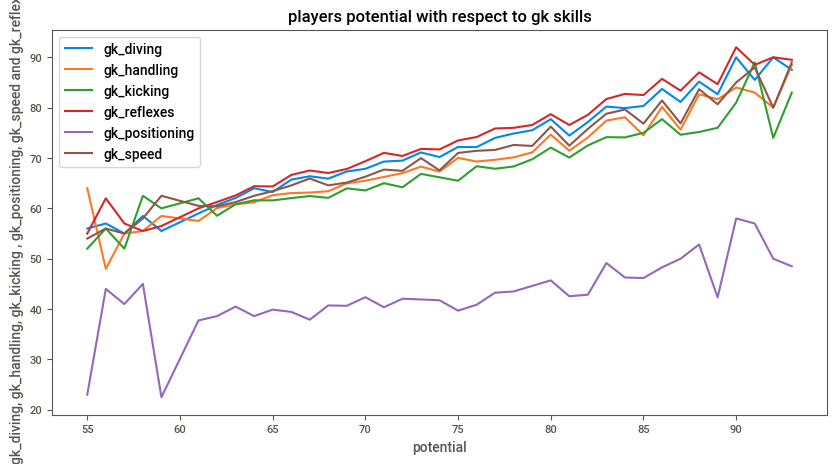

In [46]:
# Here, we are analyzing the traits of goalkeepers like diving, handling, kicking, reflexes, speed, positioning using line graph
plt.figure(figsize=(10,5))
sns.lineplot(x='potential',y='gk_diving',data=data_gk, legend='brief',ci=None).set_title('players potential with respect to gk skills')
sns.lineplot(x='potential',y= 'gk_handling' , data=data_gk,legend='brief',ci=None)
sns.lineplot(x='potential' ,y= 'gk_kicking' , data=data_gk, legend='brief',ci=None)
sns.lineplot(x='potential', y='gk_reflexes',data=data_gk, legend='brief',ci=None)
sns.lineplot(x='potential', y='gk_speed', data=data_gk, legend='brief',ci=None)
sns.lineplot(x='potential',y= 'gk_positioning',data=data_gk, legend='brief',ci=None).set_ylabel('gk_diving, gk_handling, gk_kicking , gk_positioning, gk_speed and gk_reflexes')
plt.legend(['gk_diving' , 'gk_handling', 'gk_kicking' , 'gk_reflexes', 'gk_positioning' , 'gk_speed'])
plt.show()

### Insights:
* The handling and reflexes are higher for all the goal keepers, compared to other traits.

In [47]:
# Displaying the  null values with max number in descending Order.
null_counts = data_others.isnull().sum()
null_columns = null_counts[null_counts>0].sort_values(ascending=False)
print(null_columns)

gk_kicking              16242
gk_speed                16242
gk_diving               16242
gk_handling             16242
gk_positioning          16242
gk_reflexes             16242
player_traits           10396
ram                      1374
lm                       1374
lcm                      1374
cm                       1374
rcm                      1374
rm                       1374
lwb                      1374
lf                       1374
lam                      1374
ldm                      1374
cdm                      1374
rdm                      1374
rwb                      1374
lb                       1374
lcb                      1374
cb                       1374
rcb                      1374
cam                      1374
rb                       1374
rw                       1374
rf                       1374
pace                     1374
shooting                 1374
passing                  1374
dribbling                1374
defending                1374
physic    

In [48]:
#deleting irrevelant columns from other players dataframe
data = data_others.drop([ 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits','dob','work_rate','real_face'], axis=1)


In [49]:
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000.0,RCM,17.0,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [50]:
#filling values in the columns "joined and 'contract valid untill' using "fillna" function
data['joined'].fillna(0, inplace=True)
data[ 'contract_valid_until'].fillna(0, inplace= True)


In [51]:
data['contract_valid_until'] =data['contract_valid_until'].astype(int)
data['contract_valid_until'].head()

0    2021
1    2022
2    2022
4    2024
5    2023
Name: contract_valid_until, dtype: int32

# 5.2.Bivariate Analysis:

### 1. Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving.

<Axes: xlabel='age', ylabel='overall'>

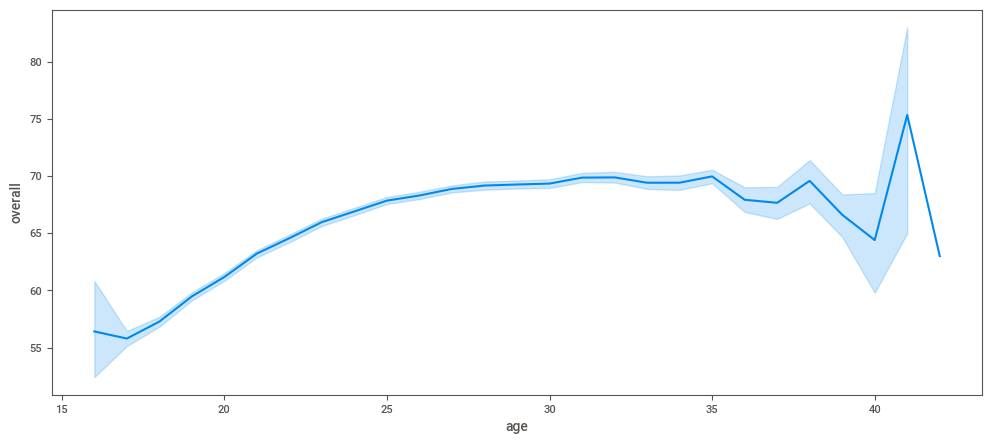

In [52]:
plt.figure(figsize=(12, 5))
sns.lineplot(data =data, x='age', y='overall')

### Insights:
* In the overall player performance graph, a noticeable trend is the improvement of players over the years. The peak performance is generally observed around the age of 30, after which a gradual decline becomes apparent. Intriguingly, there is a notable resurgence in performance around the age of 40. This resurgence could potentially be attributed to the inclusion of veteran players in the games, who bring a wealth of experience and skill to the field. This intriguing phenomenon adds an interesting dynamic to the overall trajectory of player development and performance over time.

<Axes: xlabel='age', ylabel='potential'>

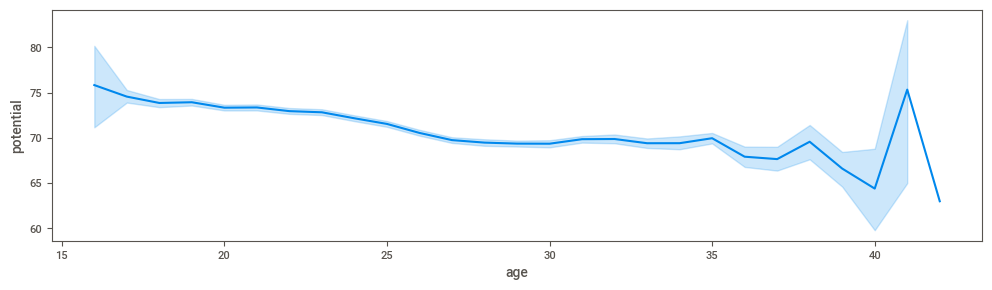

In [53]:
plt.figure(figsize=(12, 3))
sns.lineplot(data =data, x='age', y='potential')

### Insights:
* The potential of players within the mid-age range, spanning from 20 to 30 years, has exhibited relative stability with minor fluctuations. Notably, there is a discernible consistency in the capabilities of players during this phase. Interestingly, as players surpass the age of 35, there is a noticeable uptick in their potential, indicating a surprising resilience and sustained proficiency among this age group. However, it's essential to acknowledge that this heightened potential gradually diminishes with advancing age, creating a discernible decline in performance as players continue to age beyond 35.

In [54]:
# Display First Five Rows of 'wage_eur' column
data['wage_eur'].head()

0    565000
1    405000
2    290000
4    470000
5    370000
Name: wage_eur, dtype: int64

In [55]:
# Display First Five Rows of 'value_eur' column
data['value_eur'].head()

0     95500000
1     58500000
2    105500000
4     90000000
5     90000000
Name: value_eur, dtype: int64

<Axes: xlabel='overall', ylabel='value_eur'>

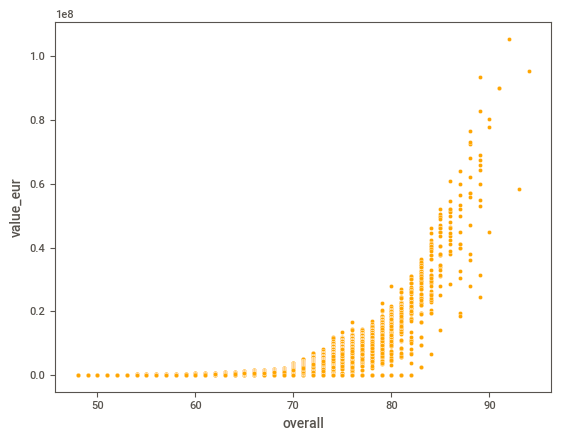

In [56]:
# Implementing data visualization among two column: 'overall' and 'value_eur' using 'scatterplot' function.
sns.scatterplot(data=data, x="overall", y="value_eur", color = "orange")

In [57]:
# Display First Five Rows of 'release_clause_eur' column
data['release_clause_eur'].head()

0    195800000.0
1     96500000.0
2    195200000.0
4    184500000.0
5    166500000.0
Name: release_clause_eur, dtype: float64

In [58]:
#fetching the count for null values in the column 'release_clause_eur'
data['release_clause_eur'].isnull().sum()

1257

In [59]:
#filling the values in the column 'release clause eur' using 'mean' function 
data['release_clause_eur']=data['release_clause_eur'].fillna( (data['release_clause_eur'].mean()))

In [60]:
#conversion for data type into 'int'
data['release_clause_eur']=data['release_clause_eur'].astype(int)

In [61]:
#fetching the columns: 'value_eur' and 'release_clause _eur' 
data_val=data.loc[:,['value_eur', 'release_clause_eur']]
data_val.head(10)

,value_eur,release_clause_eur
0,95500000,195800000
1,58500000,96500000
2,105500000,195200000
4,90000000,184500000
5,90000000,166500000
7,78000000,150200000
8,45000000,92300000
9,80500000,148900000
10,93500000,191700000
11,67500000,119800000


Text(0, 0.5, 'value in euros\xa0billions')

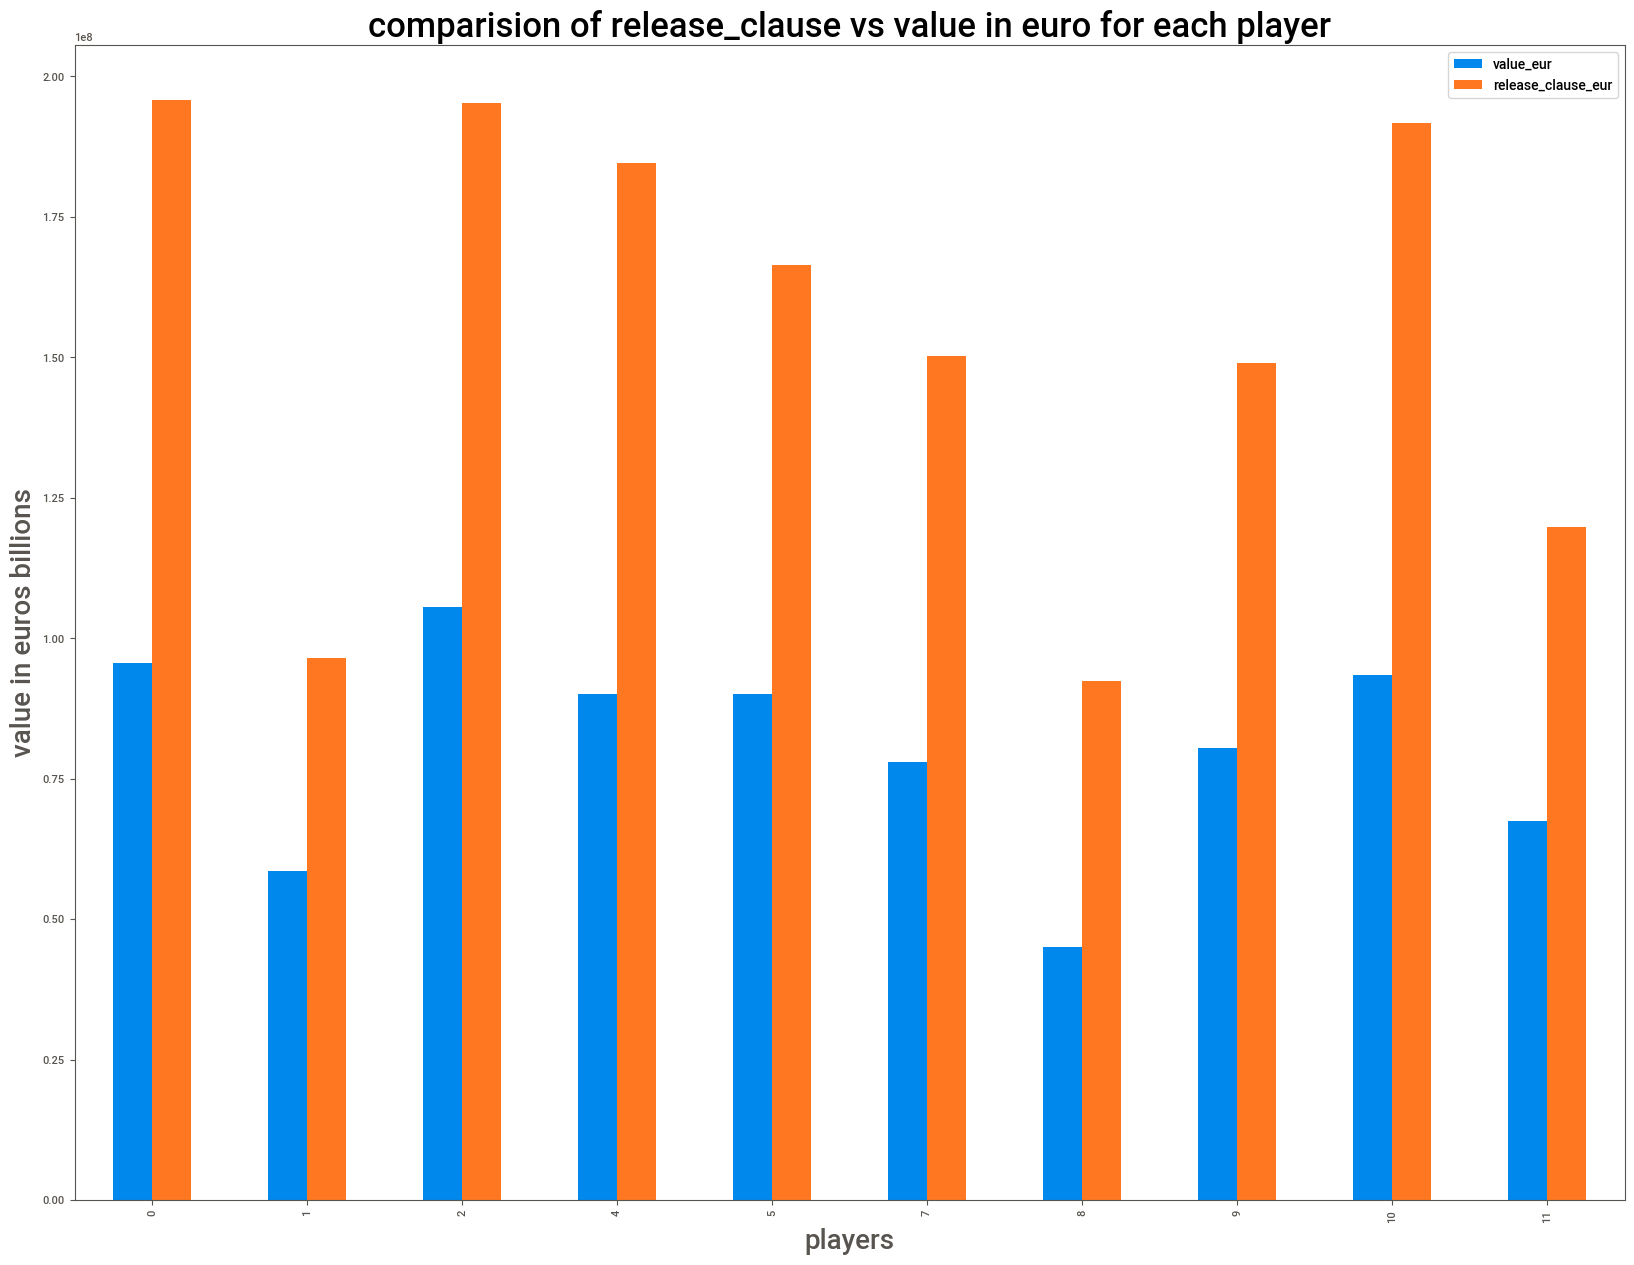

In [62]:
#displaying bar graph by comparing values of column release_clause vs value in euro for every player

data_val.head(10).plot(kind ='bar', figsize=(20,15))

#setting title for the graph
plt.title('comparision of release_clause vs value in euro for each player',fontsize=25)
            
#labelling x and y axis 
plt.xlabel('players', fontsize=20)
plt.ylabel('value in euros billions',fontsize=20)

* The release clause value is always higher than the value of each player.

In [63]:
data['international_reputation'].value_counts()

1    16215
2     1082
3      271
4       43
5        5
Name: international_reputation, dtype: int64

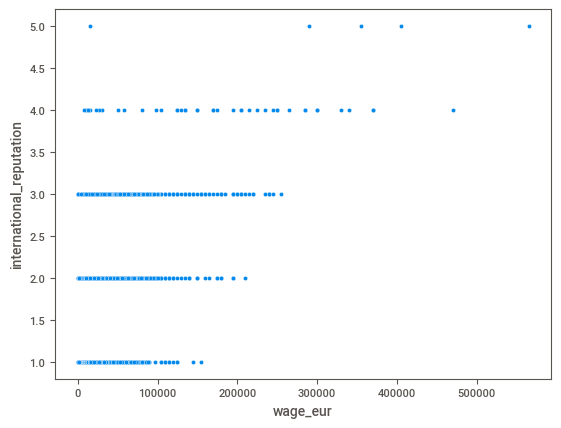

In [64]:
#using scatter function for visualizing the correlation between values of 'wage leur and 'international reputation' columns:
sns.scatterplot(data=data, x="wage_eur", y="international_reputation")
plt.show()

###  Insights:
* The plot provides a broad overview suggesting that players with a greater reputation tend to command higher wages. This observation points to a positive correlation between these two variables, indicating that as a player's reputation increases, so does their corresponding wage.

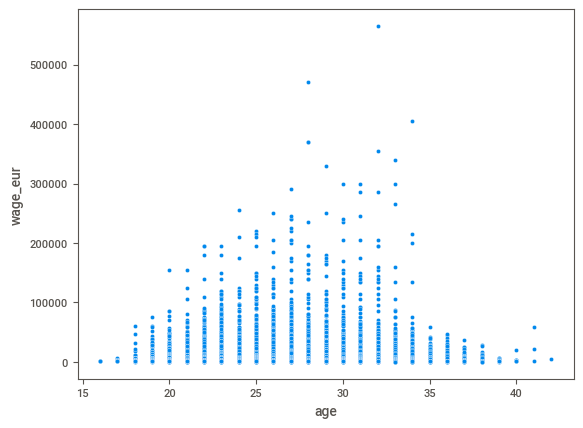

In [65]:
#using scatter function for visualizing the correlation between values of 'age' columns:
sns.scatterplot(data=data, x='age', y="wage_eur")
plt.show()

### Insights:
* The distribution of wages is concentrated in the mid-range, with players aged between 24 and 34 receiving a substantial share of the total. Notably, there is a gradual decline in wages among players of higher age brackets. Additionally, it is observed that younger players, often categorized as beginners, do not command significant wages compared to their more experienced counterparts. This dual trend underscores the influence of both age and experience on player compensation within the observed dataset.

In [66]:
#filling the values of below columns with mean value using 'mean' function
data [ 'pace' ] = data['pace'].fillna((data['pace'].mean()))
data ['shooting'] = data ['shooting'].fillna((data['shooting'].mean()))
data ['passing'] = data['passing'].fillna((data['passing'].mean()))
data ['dribbling'] = data['dribbling'].fillna((data['dribbling'].mean()))
data ['defending' ] = data['defending' ].fillna( (data['defending'].mean()))
data ['physic'] = data[ 'physic'].fillna((data['physic'].mean()))

In [67]:
# Fetching the mentioned column
df= data.loc[:,['short_name','defending','physic','pace','shooting','dribbling','passing']]
df.head()

,short_name,defending,physic,pace,shooting,dribbling,passing
0,L. Messi,39.0,66.0,87.0,92.0,96.0,92.0
1,Cristiano Ronaldo,35.0,78.0,90.0,93.0,89.0,82.0
2,Neymar Jr,32.0,58.0,91.0,85.0,95.0,87.0
4,E. Hazard,35.0,66.0,91.0,83.0,94.0,86.0
5,K. De Bruyne,61.0,78.0,76.0,86.0,86.0,92.0


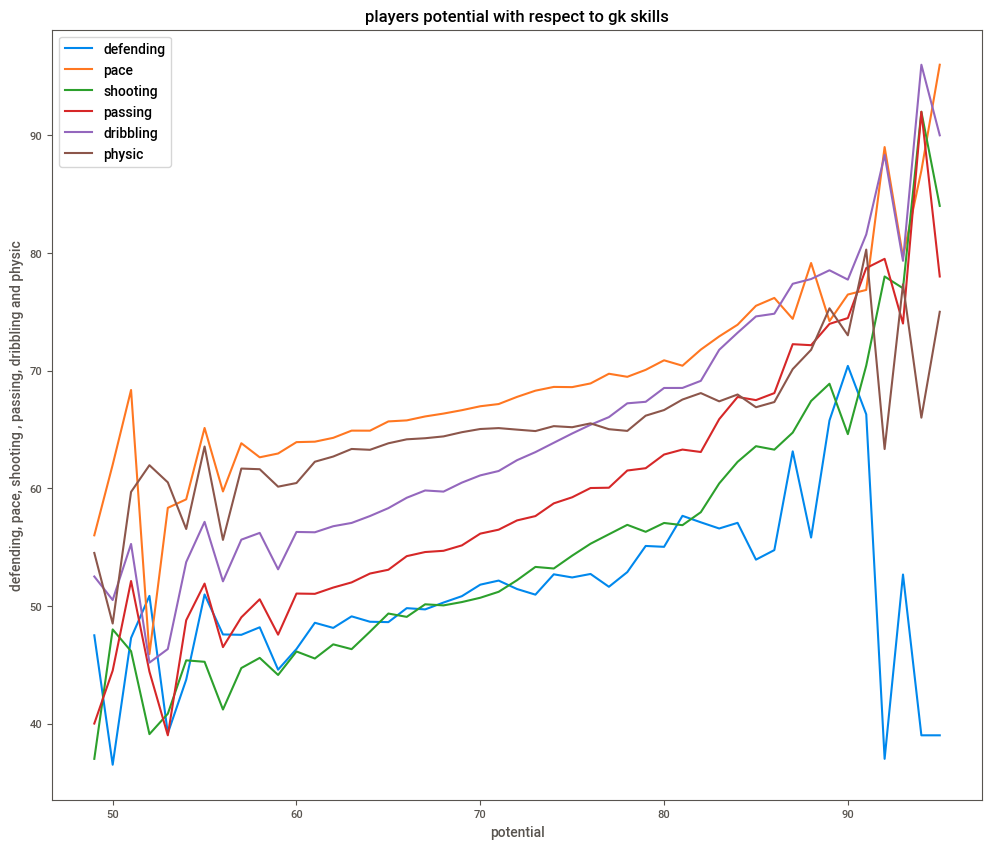

In [68]:
# Here, we are analyzing various skills of the players like defending, pace, shooting, passing, etc using line graph
plt.figure(figsize= (12,10))
sns.lineplot(x='potential',y='defending',data=data,legend='brief',ci=None).set_title('players potential with respect to gk skills')
sns.lineplot(x='potential',y= 'pace' , data=data,legend='brief',ci=None)
sns.lineplot(x='potential' ,y= 'shooting' , data=data, legend='brief',ci=None)
sns.lineplot(x='potential', y='passing',data=data, legend='brief',ci=None)
sns.lineplot(x='potential', y='dribbling', data=data, legend='brief',ci=None)
sns.lineplot(x='potential',y= 'physic',data=data, legend='brief',ci=None).set_ylabel('defending, pace, shooting , passing, dribbling and physic')
plt.legend(['defending' , 'pace', 'shooting' , 'passing', 'dribbling' , 'physic'])
plt.show()

### Insights:
Players demonstrate a consistent upward trend in traits such as dribbling, pace, and shooting, particularly when their potential exceeds 60. Interestingly, there is a relative lack of emphasis on defending skills in comparison.

Furthermore, considering the varied player positions indicated by the "team_position" attribute, it may be beneficial to introduce a more streamlined categorization. A proposed classification could include the following five positions:

* Reserve
* Substitute
* Defender
* Midfielder
* Forward

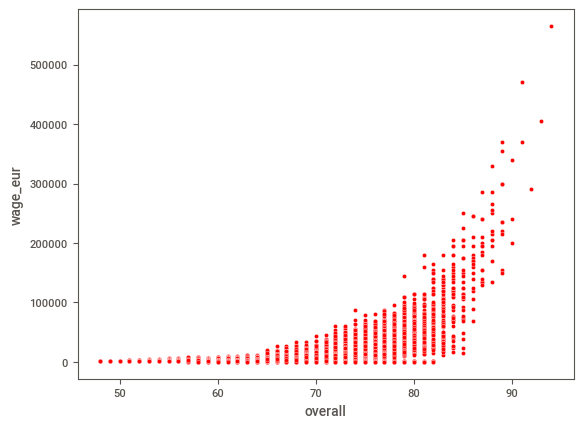

In [69]:
#selecting the rows with values more than 50 in 'overall' column 
x=data[data["overall"]>50]
              
#scatter plot for 'overall' and 'wage eur' column 
sns.scatterplot(data=data,x="overall",y="wage_eur",color="red")
plt.show()

### Insights:
* The wages are significantly higher for players with overall above 90.

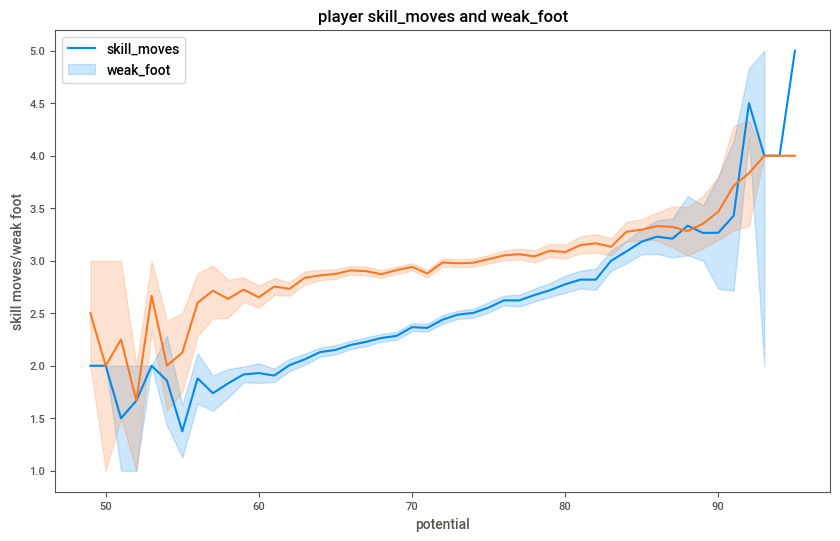

In [70]:
# Analyzing the potential of players with more skill moves vs weak foot 
plt.figure(figsize=(10,6))
#plotting line graph for skill moves and weak foot 
sns.lineplot(x='potential',y='skill_moves', data=data,legend='brief').set_title('player skill_moves and weak_foot') 
sns.lineplot(x='potential',y= 'weak_foot',data=data, legend= 'brief').set_ylabel('skill moves/weak foot') 
plt.legend(['skill_moves', 'weak_foot'])
plt.show()

### Insights:
* Players with more skill_movers are stable as compared to players who have weak_foot

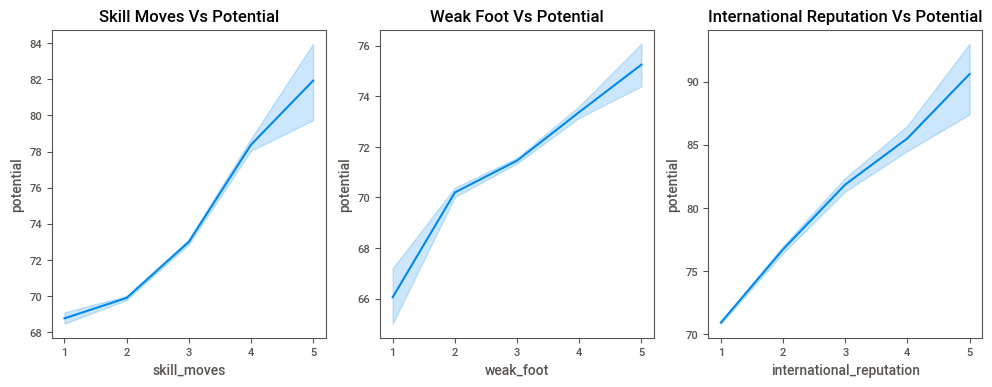

In [71]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
sns.lineplot(x="skill_moves", y='potential', data=data, ax=ax[0]).set(title='Skill Moves Vs Potential')
sns.lineplot(x="weak_foot", y='potential', data=data, ax=ax[1]).set(title='Weak Foot Vs Potential')
sns.lineplot(x="international_reputation", y='potential',data=data, ax=ax[2]).set(title='International Reputation Vs Potential')
plt.show()

### Insights:
* The proficiency in Skill Moves significantly contributes to a positive impact on Potential Rating, with a noticeable steep rise accompanying higher Skill Moves ability. Similarly, a player's adeptness in utilizing their Weak Foot also positively influences their Potential.

* Moreover, possessing a higher Potential has a direct and positive correlation with International Reputation. Players boasting a potential rating surpassing 85 tend to garner more international recognition, further establishing the link between a player's promising potential and their elevated status on the global stage.

### 2.  Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger?

In [72]:
# Seperating the Data of Strikers (ST), the Right Wingers(RW) and Left Wingers (LW)
RW = data[data['team_position'] == 'RW']
LW = data[data['team_position'] == 'LW']
ST = data[data['team_position'] == 'ST']
offensive_list = [RW,ST,LW]
op_1 = pd.concat(offensive_list)

op_2 = op_1 [['short_name','team_position', 'wage_eur']].sort_values(by='wage_eur', ascending=False).reset_index(drop=True)
op=op_2.groupby(by='team_position', as_index=False)
op.head()

,short_name,team_position,wage_eur
0,L. Messi,RW,565000
1,E. Hazard,LW,470000
2,Cristiano Ronaldo,LW,405000
3,A. Griezmann,LW,370000
4,L. Suárez,ST,355000
5,S. Agüero,ST,300000
6,R. Sterling,LW,255000
7,M. Salah,RW,240000
8,R. Lewandowski,ST,235000
9,S. Mané,LW,220000


In [73]:
op.sum()

,team_position,wage_eur
0,LW,3776000
1,RW,3385000
2,ST,7535000


In [74]:
#Average Wage of Offensive Players according to their Postion
avg_wage_op = pd.DataFrame(op.mean())
avg_wage_op.rename(columns= {"wage_eur":"Average_wage"}, inplace=True)
avg_wage_op.index+=1
avg_wage_op

,team_position,Average_wage
1,LW,23308.641975
2,RW,21024.844720
3,ST,16451.965066


<Axes: xlabel='team_position', ylabel='Average_wage'>

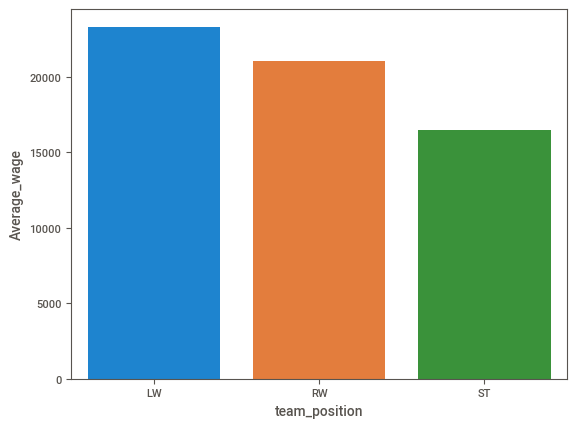

In [75]:
sns.barplot(data = avg_wage_op, x='team_position', y='Average_wage')

### Insights:
* from this info it showing mostly left wingers get paid higher than strikers and right wingers .
**Left wingers > strikers > Right wingers**

In [76]:
#fetching the columns.
columns = ['ls','st','rs', 'lw', 'lf','cf', 'rf', 'rw', 'lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 
           'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']     

In [77]:
# using the split function fixing the value of the above columns
for col in columns:
    data[col]=data[col].str.split('+', n=1,expand = True)[0]
    data[['ls','st','rs', 'lw', 'lf','cf', 'rf', 'rw', 'lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 
           'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']]=data[columns]
    
# filling the null values
data[columns]=data[columns].fillna(0)
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Messi,195800000,RW,10.0,2004-07-01,2021,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000,LW,7.0,2018-07-10,2022,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,Neymar,195200000,CAM,10.0,2017-08-03,2022,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,Normal,184500000,LW,7.0,2019-07-01,2024,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,Right,4,5,4,Normal,166500000,RCM,17.0,2015-08-30,2023,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,13,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73


# 6. Data Preprocessing:

### 6.1 Null Values:

In [78]:
data.isnull().sum()

short_name     0
age            0
height_cm      0
weight_kg      0
nationality    0
              ..
lb             0
lcb            0
cb             0
rcb            0
rb             0
Length: 82, dtype: int64

### 6.2 Duplicated values:

In [79]:
data.duplicated().sum()

0

### 6.3. Scaling The data:

In [80]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
lc = LabelEncoder()

In [81]:
data['nationality']=lc.fit_transform(data["nationality"])
data['club']=lc.fit_transform(data['club'])
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,5,224,94,94,95500000,565000,Left,5,4,4,Messi,195800000,RW,10.0,2004-07-01,2021,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,187,83,120,350,93,93,58500000,405000,Right,5,4,5,C. Ronaldo,96500000,LW,7.0,2018-07-10,2022,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,Neymar Jr,27,175,68,18,462,92,92,105500000,290000,Right,5,5,5,Neymar,195200000,CAM,10.0,2017-08-03,2022,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
4,E. Hazard,28,175,74,12,505,91,91,90000000,470000,Right,4,4,4,Normal,184500000,LW,7.0,2019-07-01,2024,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
5,K. De Bruyne,28,181,70,12,400,91,91,90000000,370000,Right,4,5,4,Normal,166500000,RCM,17.0,2015-08-30,2023,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,13,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73


In [82]:
# minimum value in the "overall" column.
data['overall'].min()

48

In [83]:
## Clustring analysis:
data.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'body_type',
       'release_clause_eur', 'team_position', 'team_jersey_number', 'joined',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_p

In [84]:
# Selecting some columns:
data = data[['short_name','age','overall','value_eur','international_reputation','skill_moves','pace','shooting','passing','dribbling','physic']]


In [85]:
# Selecting the rows having value greater than 50 "overall" column.
data = data[data.overall>50]

In [86]:
names = data.short_name.tolist()

In [87]:
# deleting the short name column.
data = data.drop("short_name",axis=1)

In [88]:
data.head()

,age,overall,value_eur,international_reputation,skill_moves,pace,shooting,passing,dribbling,physic
0,32,94,95500000,5,4,87.0,92.0,92.0,96.0,66.0
1,34,93,58500000,5,5,90.0,93.0,82.0,89.0,78.0
2,27,92,105500000,5,5,91.0,85.0,87.0,95.0,58.0
4,28,91,90000000,4,4,91.0,83.0,86.0,94.0,66.0
5,28,91,90000000,4,4,76.0,86.0,92.0,86.0,78.0


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(data)

In [90]:
df

array([[6.15384615e-01, 1.00000000e+00, 9.05213270e-01, ...,
        1.00000000e+00, 1.00000000e+00, 6.19047619e-01],
       [6.92307692e-01, 9.76744186e-01, 5.54502370e-01, ...,
        8.52941176e-01, 9.04109589e-01, 8.09523810e-01],
       [4.23076923e-01, 9.53488372e-01, 1.00000000e+00, ...,
        9.26470588e-01, 9.86301370e-01, 4.92063492e-01],
       ...,
       [7.69230769e-02, 0.00000000e+00, 2.84360190e-04, ...,
        4.88732009e-01, 5.41528559e-01, 6.01217107e-01],
       [4.23076923e-01, 0.00000000e+00, 3.79146919e-04, ...,
        3.08823529e-01, 3.01369863e-01, 5.87301587e-01],
       [4.23076923e-01, 0.00000000e+00, 3.79146919e-04, ...,
        2.79411765e-01, 3.83561644e-01, 4.28571429e-01]])

In [91]:
data = pd.DataFrame(df,columns=data.columns)
data

,age,overall,value_eur,international_reputation,skill_moves,pace,shooting,passing,dribbling,physic
0,0.615385,1.000000,0.905213,1.00,0.75,0.875000,0.987179,1.000000,1.000000,0.619048
1,0.692308,0.976744,0.554502,1.00,1.00,0.916667,1.000000,0.852941,0.904110,0.809524
2,0.423077,0.953488,1.000000,1.00,1.00,0.930556,0.897436,0.926471,0.986301,0.492063
3,0.461538,0.930233,0.853081,0.75,0.75,0.930556,0.871795,0.911765,0.972603,0.619048
4,0.461538,0.930233,0.853081,0.75,0.75,0.722222,0.910256,1.000000,0.863014,0.809524
...,...,...,...,...,...,...,...,...,...,...
17400,0.269231,0.000000,0.000474,0.00,0.25,0.666667,0.397436,0.397059,0.452055,0.412698
17401,0.192308,0.000000,0.000474,0.00,0.25,0.569444,0.307692,0.367647,0.328767,0.460317
17402,0.076923,0.000000,0.000284,0.00,0.00,0.606957,0.478183,0.488732,0.541529,0.601217
17403,0.423077,0.000000,0.000379,0.00,0.25,0.458333,0.269231,0.308824,0.301370,0.587302


# 7. Model Creation:
### 7.1. K-Means Algorithem:-


In [92]:
# Import K_means:
from sklearn.cluster import KMeans

# Initialize the model:
model = KMeans(n_clusters=6, random_state=10)

# Train the model:
model.fit(data)

KMeans(n_clusters=6, random_state=10)

In [93]:
# centroids - cluster centers.
# no of clusters is same as no of centroieds
model.cluster_centers_

array([[2.48554183e-01, 3.36394500e-01, 1.24078770e-02, 3.64963504e-04,
        5.07572993e-01, 7.04947283e-01, 5.39172749e-01, 5.17104981e-01,
        6.15108489e-01, 4.67622523e-01],
       [4.37669566e-01, 4.60930715e-01, 3.23493761e-02, 7.90975104e-03,
        5.20811722e-01, 6.70398225e-01, 6.15820167e-01, 6.02780998e-01,
        6.47317115e-01, 6.59574030e-01],
       [5.04778490e-01, 3.95079167e-01, 1.77551744e-02, 2.32606295e-02,
        2.17076201e-01, 5.31708727e-01, 4.47476960e-01, 4.89088173e-01,
        5.07059491e-01, 6.97310468e-01],
       [3.18691936e-01, 2.80597686e-01, 7.52105227e-03, 1.32850242e-03,
        2.51328502e-01, 4.55065754e-01, 1.97095256e-01, 2.70545610e-01,
        3.00972801e-01, 6.58615137e-01],
       [1.97600304e-01, 1.97826399e-01, 3.67510709e-03, 2.56739074e-16,
        2.11405672e-01, 6.15875692e-01, 4.24111857e-01, 4.19788432e-01,
        5.01999682e-01, 5.08842679e-01],
       [4.91416775e-01, 6.43213770e-01, 1.44222472e-01, 3.05790960e-01,
   

In [94]:
model.labels_

array([5, 5, 5, ..., 4, 3, 4])

In [95]:
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()

In [96]:
data_model_robust = r_scaler.fit_transform(data)
data_model_final = pd.DataFrame(data_model_robust)

In [97]:
data_model_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17405 entries, 0 to 17404
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       17405 non-null  float64
 1   1       17405 non-null  float64
 2   2       17405 non-null  float64
 3   3       17405 non-null  float64
 4   4       17405 non-null  float64
 5   5       17405 non-null  float64
 6   6       17405 non-null  float64
 7   7       17405 non-null  float64
 8   8       17405 non-null  float64
 9   9       17405 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


In [98]:
data_model_final.head()

,0,1,2,3,4,5,6,7,8,9
0,1.166667,3.111111,53.394366,1.00,2.0,1.461538,2.052632,2.674325,3.000000,0.083333
1,1.500000,3.000000,32.549296,1.00,3.0,1.692308,2.105263,1.905094,2.363636,1.083333
2,0.333333,2.888889,59.028169,1.00,3.0,1.769231,1.684211,2.289709,2.909091,-0.583333
3,0.500000,2.777778,50.295775,0.75,2.0,1.769231,1.578947,2.212786,2.818182,0.083333
4,0.500000,2.777778,50.295775,0.75,2.0,0.615385,1.736842,2.674325,2.090909,1.083333


### 7.2. Principal Component Analysis Algorithem:-

In [99]:
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(data_model_final)

In [100]:
exp_var = pca.explained_variance_ratio_
exp_var

array([7.18331297e-01, 1.13467416e-01, 7.27602126e-02, 2.96358996e-02,
       2.09019452e-02, 1.92951828e-02, 1.31389450e-02, 7.42346015e-03,
       4.70194861e-03, 3.43693587e-04])

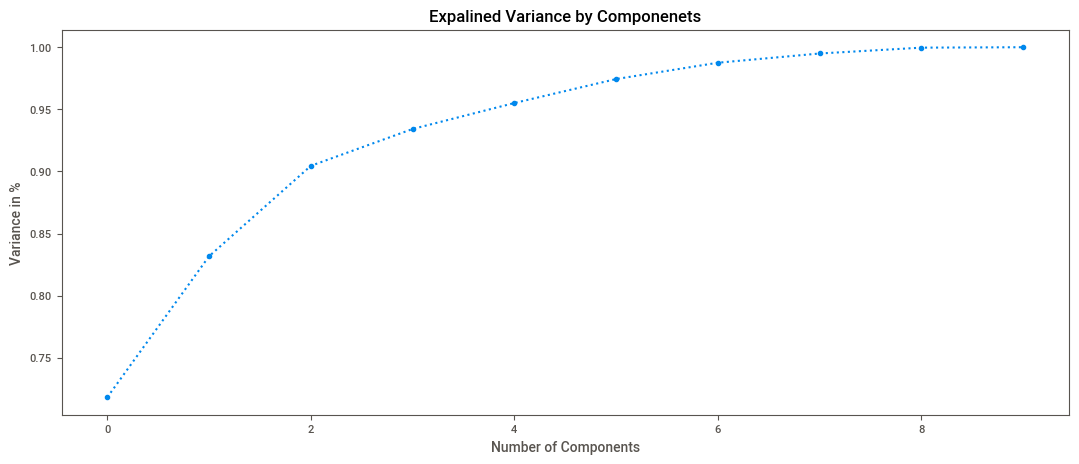

In [102]:
# Scree plot to get the optimum value of principal components
plt.figure(figsize=(13,5))
plt.plot(range(0,10), pca.explained_variance_ratio_.cumsum(), marker='o',linestyle='dotted')
plt.xlabel('Number of Components')
plt.ylabel('Variance in %') # for each component
plt.title('Expalined Variance by Componenets')
plt.show()

In [106]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(data_model_final)
new_data_pca = pd.DataFrame(new_data)
new_data_pca.columns=['P1','P2','P3','P4','P5']
new_data_pca.head()


,P1,P2,P3,P4,P5
0,51.821617,7.830923,4.220269,1.691645,2.258821
1,31.879068,2.961696,1.356679,0.262116,0.120796
2,57.123052,9.158750,6.050974,2.052872,1.475707
3,48.673399,7.523012,4.626192,1.163200,1.856428
4,48.637354,8.266657,3.520438,1.466544,1.540184


## K Means Clustering Model Building

**Elbow Method for finding out optimum number of clusters**
>In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster.

In [107]:
from sklearn.cluster import KMeans
WCSS = [] # Within cluster sum of square:
for k in range(2,11):
    kmeans =KMeans(n_clusters=k, random_state=5)
    kmeans.fit(new_data_pca)
    WCSS.append(kmeans.inertia_)

In [108]:
WCSS

[136992.57482046427,
 93604.37766132763,
 74972.83455793471,
 62416.92483915744,
 53718.23147465232,
 48161.88818227594,
 42849.26539138981,
 39312.012289122395,
 36577.64611152942]

Text(0, 0.5, 'WCSS')

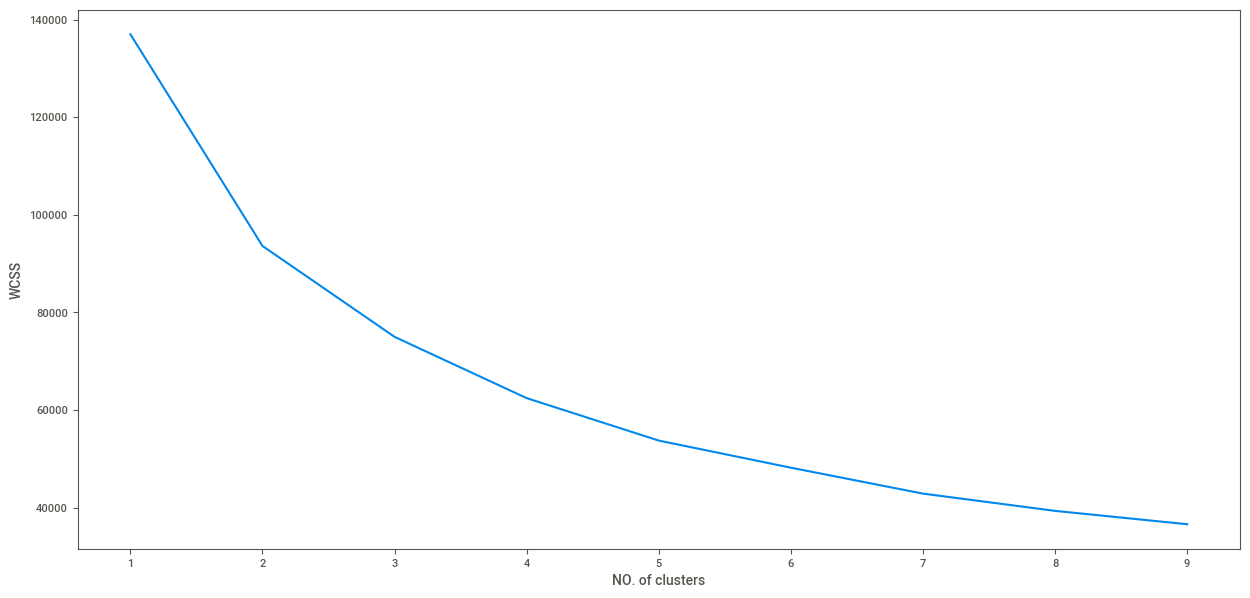

In [109]:
plt.figure(figsize=(15,7))
plt.plot(list(range(1,10)),WCSS)
plt.xlabel("NO. of clusters")
plt.ylabel("WCSS")

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
1: Means clusters are well apart from each other and clearly distinguished

In [120]:
x=data
model=KMeans(n_clusters=2,random_state=10)
model.fit(x)

KMeans(n_clusters=2, random_state=10)

In [124]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [125]:
# Silhouette Score for different numbers of clusters:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
silhouette_scr = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit_transform(new_data_pca)
    cluster_labels = kmeans.labels_
    silhouette_scr.append(silhouette_score(new_data_pca,cluster_labels))

In [127]:
silhouette_scr

[0.7638743063117731,
 0.5175415516980758,
 0.276102843922158,
 0.27357814784994944,
 0.26727143484647414,
 0.2629349492024116,
 0.25966318511710157,
 0.25589334352070014,
 0.24756370021335192]

Text(0, 0.5, 'Silhouette score')

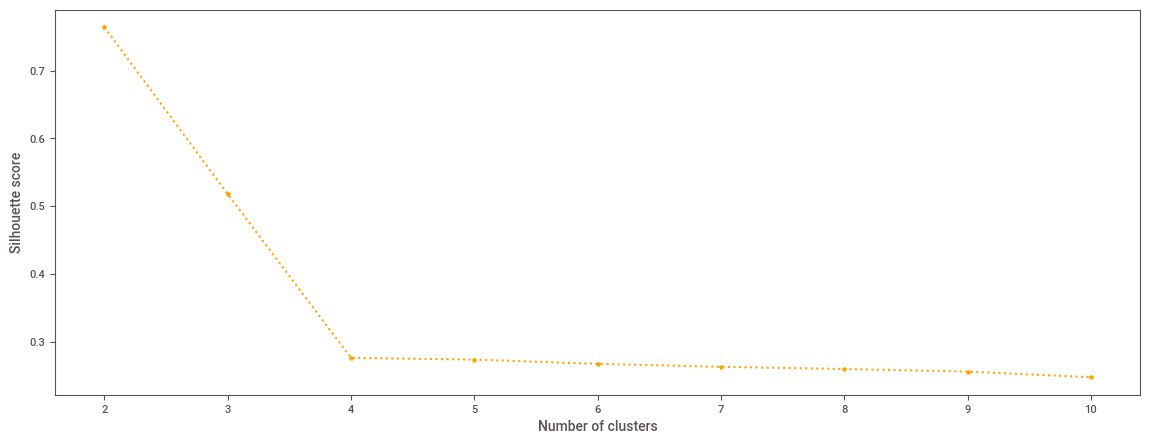

In [128]:
plt.figure(figsize=(14,5))
plt.plot(range_n_clusters,silhouette_scr,color='orange',marker='*',linestyle='dotted')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [129]:
new_data_pca.head()

,P1,P2,P3,P4,P5
0,51.821617,7.830923,4.220269,1.691645,2.258821
1,31.879068,2.961696,1.356679,0.262116,0.120796
2,57.123052,9.158750,6.050974,2.052872,1.475707
3,48.673399,7.523012,4.626192,1.163200,1.856428
4,48.637354,8.266657,3.520438,1.466544,1.540184


In [130]:
kmeans_pca = KMeans(n_clusters=6, random_state=42).fit(new_data_pca)
kmeans_pca_clustered =pd.DataFrame(new_data_pca.copy())
kmeans_pca_clustered.loc[:,'Cluster'] = kmeans_pca.labels_

In [131]:
kmeans_pca_clustered.shape

(17405, 6)

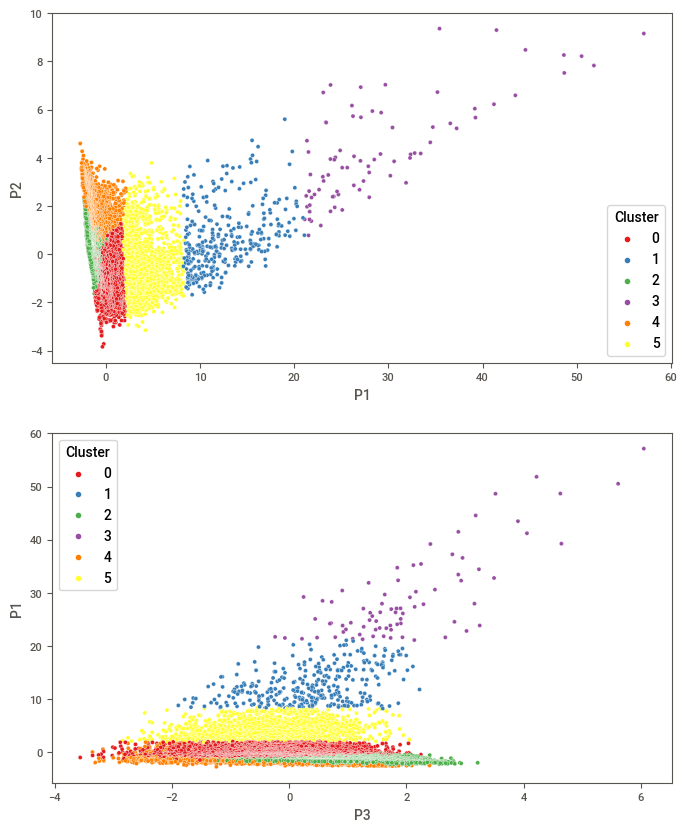

In [132]:
import seaborn as sns
fig1, (axes) = plt.subplots(2,1,figsize=(8,10))


scat_1=sns.scatterplot (x='P1' , y='P2', data=kmeans_pca_clustered,hue='Cluster',  palette='Set1', ax=axes[0], legend='full')

scat_2=sns.scatterplot (x='P3' , y='P1', data=kmeans_pca_clustered,hue='Cluster', palette='Set1', ax=axes[1], legend='full')
plt.show()

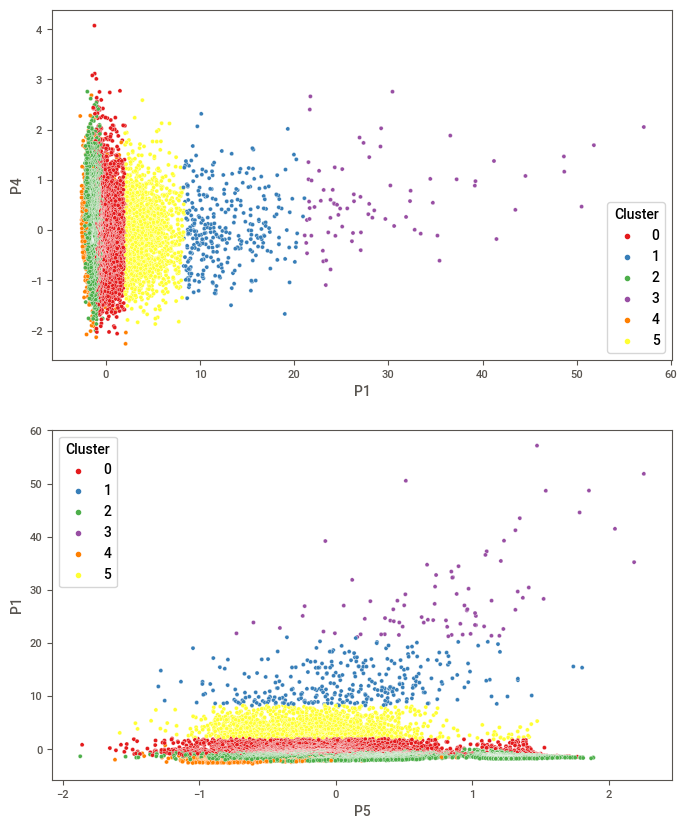

In [133]:
import seaborn as sns
fig1, (axes) = plt.subplots(2,1,figsize=(8,10))


scat_1=sns.scatterplot (x='P1' , y='P4', data=kmeans_pca_clustered,hue='Cluster',  palette='Set1', ax=axes[0], legend='full')

scat_2=sns.scatterplot (x='P5' , y='P1', data=kmeans_pca_clustered,hue='Cluster', palette='Set1', ax=axes[1], legend='full')
plt.show()

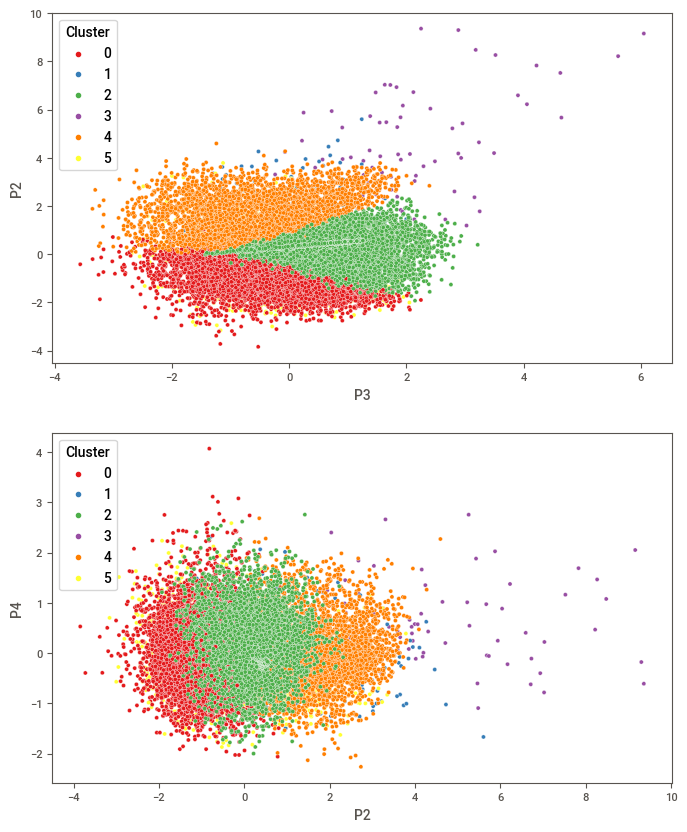

In [134]:
import seaborn as sns
fig1, (axes) = plt.subplots(2,1,figsize=(8,10))


scat_1=sns.scatterplot (x='P3' , y='P2', data=kmeans_pca_clustered,hue='Cluster',  palette='Set1', ax=axes[0], legend='full')

scat_2=sns.scatterplot (x='P2' , y='P4', data=kmeans_pca_clustered,hue='Cluster', palette='Set1', ax=axes[1], legend='full')
plt.show()

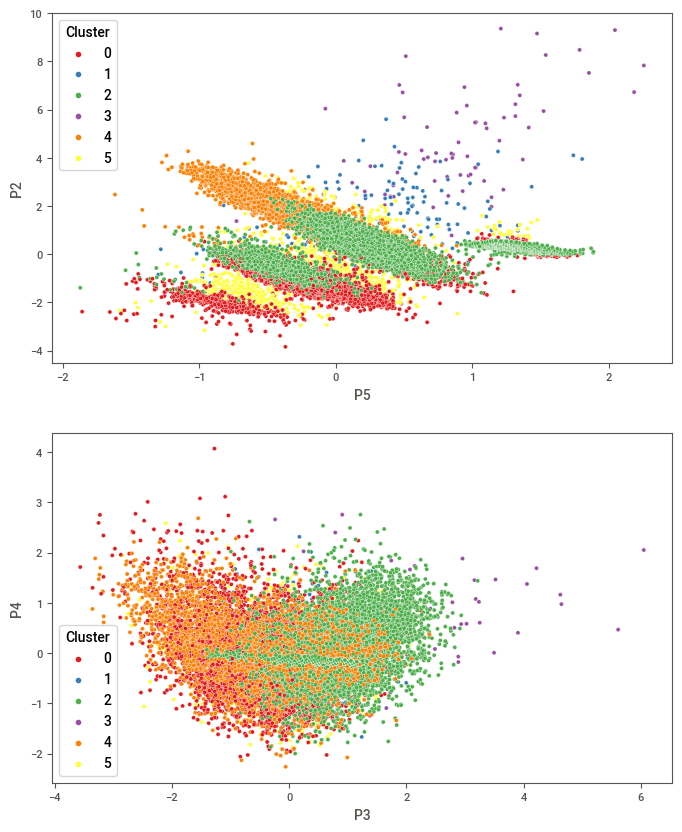

In [135]:
import seaborn as sns
fig1, (axes) = plt.subplots(2,1,figsize=(8,10))


scat_1=sns.scatterplot (x='P5' , y='P2', data=kmeans_pca_clustered,hue='Cluster',  palette='Set1', ax=axes[0], legend='full')

scat_2=sns.scatterplot (x='P3' , y='P4', data=kmeans_pca_clustered,hue='Cluster', palette='Set1', ax=axes[1], legend='full')
plt.show()

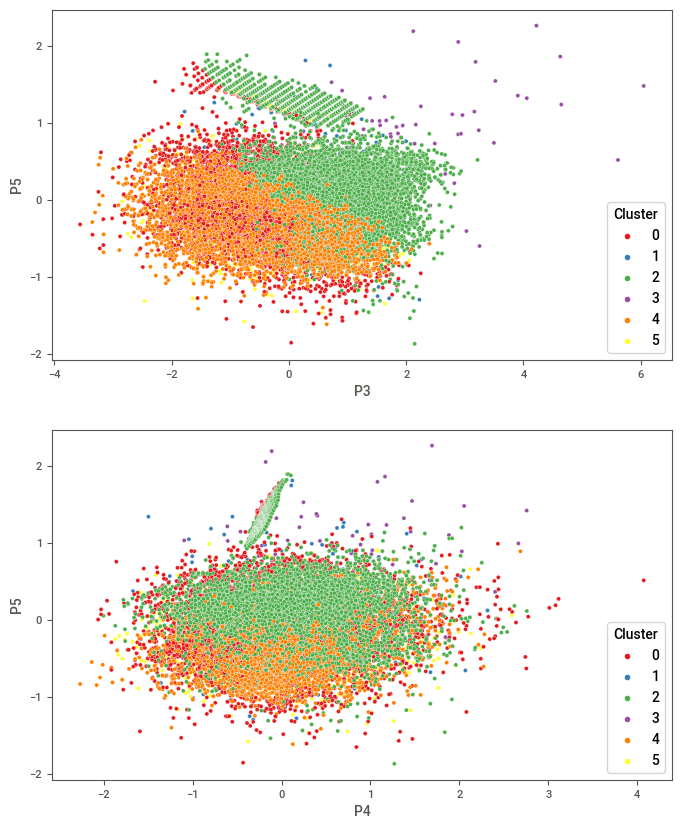

In [136]:
import seaborn as sns
fig1, (axes) = plt.subplots(2,1,figsize=(8,10))


scat_1=sns.scatterplot (x='P3' , y='P5', data=kmeans_pca_clustered,hue='Cluster',  palette='Set1', ax=axes[0], legend='full')

scat_2=sns.scatterplot (x='P4' , y='P5', data=kmeans_pca_clustered,hue='Cluster', palette='Set1', ax=axes[1], legend='full')
plt.show()

### 1. Global Player Production Trends:
England, Germany, and Spain emerge as the leading nations in producing football players within the FIFA 20 landscape. These countries significantly outpace others, underscoring their robust footballing traditions.

### 2. Age Dynamics in Performance:
Player performance tends to peak around the age of 30, followed by a gradual decline. Intriguingly, there is a resurgence in performance during the late 30s, possibly attributed to the inclusion of seasoned veterans. This insight holds paramount importance for clubs and teams in the realms of player scouting and development.

### 3. Positional Wage Dynamics:
Within offensive positions, left-wingers command the highest wages, closely trailed by strikers and right-wingers. Awareness of these positional wage trends can wield considerable influence in player recruitment and salary negotiations.

### 4. Goalkeeper Proficiency:
Goalkeepers shine in specific attributes like handling and reflexes, pivotal for their role on the field. Notably, their wages generally stand lower compared to outfield players.

### 5. Release Clauses vs. Player Valuations:
Release clauses consistently surpass reported player values, underscoring the premium associated with player transfers. This revelation holds strategic significance for clubs and agents engaged in contract negotiations.

### 6. Player Segmentation Analysis:
Through clustering analysis, distinct player groups emerge based on various attributes. This segmentation aids clubs in strategically targeting players aligned with their unique team requirements.

### 7. Strategic Player Development:
Insights into the age at which players peak and decline prove invaluable for clubs managing player development programs. Striking the right balance between youth and experience becomes a pivotal aspect of optimal team strategy.

## Overall Impact:
The FIFA 20 player data analysis initiative yields actionable insights, benefiting football clubs, agents, players, and fans within the virtual football ecosystem. It serves as a compass for refining talent scouting, recruitment strategies, and contract negotiations. Moreover, it enriches fan engagement by providing a profound understanding of player attributes and market trends in the FIFA 20 universe.